**Dataset-1:** This part of the lab will use a dataset that represents student admission into University based on Exam-1 and Exam-2 test scores. The dataset is uploaded in iLearn as Dataset-1. You need to upload it to your Google Colab. This represents linearly separable data.  

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

**Step-2: Load the Data:** The next step is to load the data. In this lab, the dataset is saved as .txt file (previous lab the data was saved as .csv file). Here, we will implement a function that helps us to load the data.

In [ ]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

Now, let's load the data for this problem.

In [ ]:
data = loaddata('Dataset-1.txt', ',')

Dimensions:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


*Process the data:* Let's separate our X (features) and Y (labels) parts of the data.

In [ ]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

*Plot the data:* We will implement a function to help us with the scatter plot.

In [ ]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

Let's plot the data by calling our plot function.

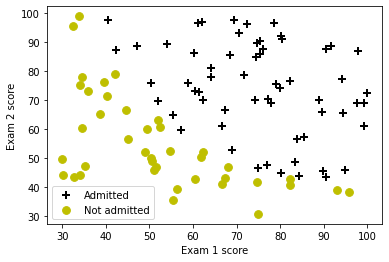

In [ ]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

**Step-3: Implement a Logistic Regression Model:**

*Step-3.1: Sigmoid Function:* Let's implement the Sigmoid function.

In [ ]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

Let's test it:

In [ ]:
sigmoid(0)

0.5

*Step-3.2: Cost Function and Gradient:* Let's first implement a function to calculate the cost  $J$. This function will return the cost value.

In [ ]:
def costFunction(theta, X, y):
    m = y.size
    f = sigmoid(X.dot(theta))

    J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y))

    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

Let's implement another function to get the gradient.

In [ ]:
def gradient(theta, X, y):
    m = y.size
    f = sigmoid(X.dot(theta.reshape(-1,1)))

    grad =(1/m)*X.T.dot(f-y)

    return(grad.flatten())

Let's test our cost and gradient functions.

In [ ]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599453
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


*Step-3.3: Finding the Optimal $\theta$:* Next, train our model to get the optimal $\theta$ values. This will be done by minimizing the cost function. We will use the built-in minimization function in python.   

In [ ]:
opt_theta = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})

<ipython-input-9-afe53ac04d20>:5: RuntimeWarning: divide by zero encountered in log
  J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y))
<ipython-input-9-afe53ac04d20>:5: RuntimeWarning: divide by zero encountered in log
  J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y))


Let's print the optimal values of $\theta$.

In [ ]:
print('Thetas: \n', opt_theta)

*Step-3.4: Build a Classification Model:* Let's implement a classification function that compares the probability of being in a class with some threshold and then returns the class label.

In [ ]:
def classify(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

Now, let's use the classify function and find the accuracy of our classification.

In [ ]:
p = classify(opt_theta.x, X)
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


*Step-3.5: Plot the Decision Boundary:* Let's plot the decision boundary.

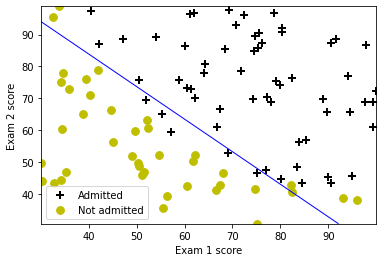

In [ ]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
f = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(opt_theta.x))
f = f.reshape(xx1.shape)
plt.contour(xx1, xx2, f, [0.5], linewidths=1, colors='b');

**Built-in Logistic Regression Function:** Let's use the built-in function in python for logistic regression.

*1-Import Libraries:*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

*2-Train the Model:*

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

*3-Test the Model:*

In [ ]:
predictions = logisticRegr.predict(X)

*4-Evaluate the Model:*

In [ ]:
score = logisticRegr.score(X, y)
print(score)

0.89


**This is the same score we got using the model we developed from scratch!**

In [ ]:
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[34  6]
 [ 5 55]]


**Dataset-2:** This part of the lab will use a dataset that represents microchip quality (accepted or rejected) based on two test scores. The dataset is uploaded in iLearn (assignment) as Dataset-2. You need to upload it to your Google Colab. This represents non-linearly separable data.  

**Step-2: Load the Data:** We can use the loaddata function we created earlier.

In [ ]:
data2 = loaddata('Dataset-2.txt', ',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


Then, we separate our features as before:

In [ ]:
y = np.c_[data2[:,2]]
X = data2[:,0:2]

And we plot the data using the plotData function we created before:

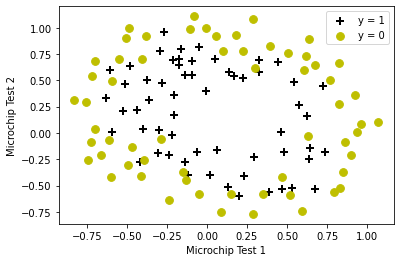

In [ ]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

As you can see this data cannot be separated by a line, we need to separate the two classes using non-linear decision boundary. For that, we need higher order features. As stated in the assignment, we will use a function to create these higher order features.

In [ ]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
XX.shape

(118, 28)

**Step-3: Implement Logistic Regression with Regularization:**

As stated in the assignment, we will update our cost and gradient functions to have a regularization term. This is because we will have higher order features and we do not want our model to be too complex to avoid overfitting.

*Regularized Cost Function:*

In [ ]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    f = sigmoid(XX.dot(theta))

    J = -1*(1/m)*(np.log(f).T.dot(y)+np.log(1-f).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))

    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

*Regularized Gradient Function:*

In [ ]:
def gradientReg(theta, reg, *args):
    m = y.size
    f = sigmoid(XX.dot(theta.reshape(-1,1)))

    grad = (1/m)*XX.T.dot(f-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]

    return(grad.flatten())

Then, we train our model ==> First, with regularization parameter = 0 (lambda=0):

In [ ]:
lambd = 0
initial_theta = np.zeros(XX.shape[1])
opt_theta2 = minimize(costFunctionReg, initial_theta, args=(lambd, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})

Then, let's see the decision boundary: (note: here I made maxiter = 3000, these are the maximum number of iterations in the minimization function, when you choose large number of iterations, your model with converge to an optimal solution)

<ipython-input-7-71a3b42dc05c>:2: RuntimeWarning: overflow encountered in exp
  return(1 / (1 + np.exp(-z)))


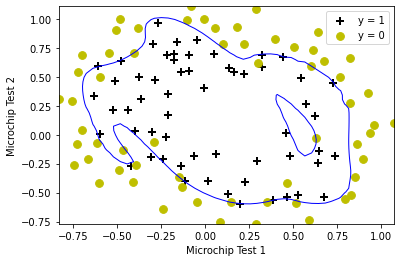

In [ ]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta2.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

This is a very complex decision boundary!! Let's simplify our model by increasing our regularization term. Let's make lambda=1. We retrain the model when lambda=1 and we plot the decision boundary:

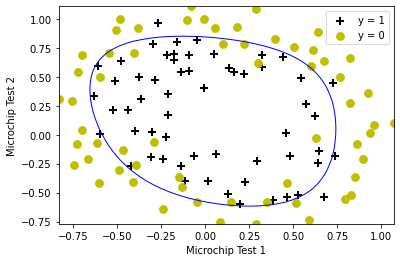

In [ ]:
lambd = 1
opt_theta2 = minimize(costFunctionReg, initial_theta, args=(lambd, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta2.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

This is a much less complex complex decision boundary, your model will fit better with such a boundary. Let's check the accuracy of this model:

In [ ]:
accuracy = 100*sum(classify(opt_theta2.x, XX) == y.ravel())/y.size
print('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), lambd))

Train accuracy 83.05% with Lambda = 1


Good result! Let's see what happens when we further enlarge lambda, e.g., lambda=10"

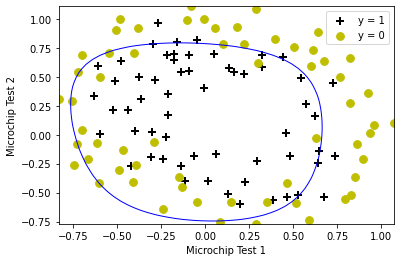

In [ ]:
lambd = 10
opt_theta2 = minimize(costFunctionReg, initial_theta, args=(lambd, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(opt_theta2.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

You can see the decision boundary is becoming off! This will indeed have more wrong classification results than lambda=1. Let's check:

In [ ]:
accuracy = 100*sum(classify(opt_theta2.x, XX) == y.ravel())/y.size
print('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), lambd))

Train accuracy 74.58% with Lambda = 10


It is true! This model training accuracy is less than the previous one. Choosing lambda=1 is better than lambda=0 because the model will have less complex decision boundary. But, choosing lambda=10 is worse than lambda=1 as the decisin boundary is shifted we had many wrong classification. So, the model with lambda=1 would be the best among the three cases (lambda=0, lambda=1, and lambda=10).